# 第１章：演習問題模範解答
- Iris Datasetを「from sklearn.datasets import load_iris」を使って取得し, 一番大きなコサイン類似度の組を見つけるPythonプログラムを作成せよ.

In [ ]:
import numpy as np
def cos_sim(x,y):
  return np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y))

In [ ]:
from sklearn.datasets import load_iris
import numpy as np

iris = load_iris()
data = iris.data

max_cos_sim = -1
pair = None

for i in range(len(data)):
    for j in range(i+1, len(data)):
        sim = cos_sim(data[i], data[j])
        if sim > max_cos_sim:
            max_cos_sim = sim
            pair = (i, j)

print(f"The pair with the highest cosine similarity is: {pair}")
print(f"Cosine Similarity: {max_cos_sim}")


The pair with the highest cosine similarity is: (101, 142)
Cosine Similarity: 1.0


# 第2章：演習問題模範解答
- 好きな画像(pngまたはjpgファイル画像)を白黒の座標点として読み取り, その画像を線形変換を使って, 60°左へ回転するプログラムを作成せよ. ちなみに, jpgファイル画像を白黒の座標点として読み込み, matplotlib上に提示するプログラムは下記の通りであり, その画像の各座標をベクトル$\mathbf{x}_i$とみなし, $A=\begin{bmatrix}
\cos 60^{\circ} & -\sin 60^{\circ} \\
\sin 60{^\circ} & \cos ^{\circ} \\
\end{bmatrix}
$という表現行列$A$を使って, $A\mathbf{x}_i$を求めればよい.

In [ ]:
import numpy as np
from PIL import Image

def imgfile2xy(filename):
  threshold=100
  img = np.array(Image.open(filename).convert('L').resize((200, 200)))
  img_bool = img > threshold
  x = np.array([])
  y = np.array([])
  for i in range(img_bool.shape[0]):
    for j in range(img_bool.shape[1]):
      if img_bool[i,j]==False:
        x=np.append(x, j)
        y=np.append(y, (img_bool.shape[0]-1)-i)

  return np.concatenate([[x], [y]])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
img = imgfile2xy('/content/drive/MyDrive/Colab Notebooks/Document/MathematicalForDataScience/nakanishi.png') # pngまたはjpgファイル画像のパスを設定すること
img

array([[101.,  98., 100., ..., 197., 198., 199.],
       [192., 191., 191., ...,   0.,   0.,   0.]])

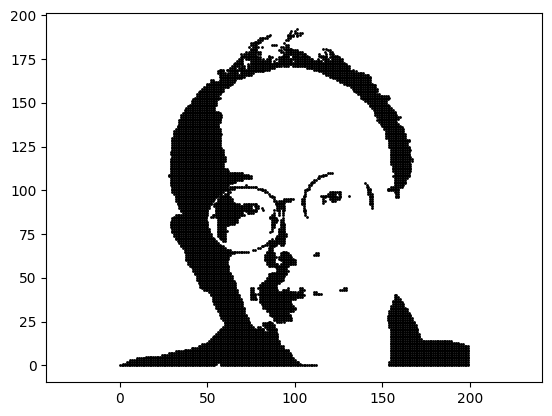

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(img[0], img[1], s=1, color="black")
plt.axis('equal')
plt.show()

In [ ]:
import math
A=np.array([
            [math.cos(math.radians(60)),-math.sin(math.radians(60))],
            [math.sin(math.radians(60)),math.cos(math.radians(60))]
])

In [ ]:
imgnew=np.dot(A,img)
imgnew

array([[-115.77687753, -116.41085212, -115.41085212, ...,   98.5       ,
          99.        ,   99.5       ],
       [ 183.46856578,  180.37048957,  182.10254038, ...,  170.60700455,
         171.47302995,  172.33905535]])

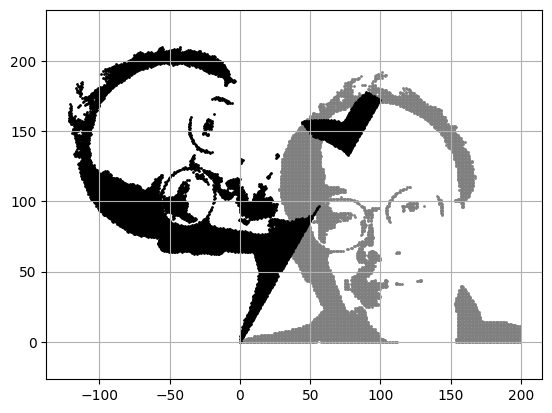

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(img[0],img[1], s=1, color="gray")
plt.scatter(imgnew[0], imgnew[1], s=1, color="black")
plt.axis('equal')
plt.grid(which='major')
plt.show()

# 第3章：演習問題模範解答
- 固有値・固有ベクトルを使った応用でPageRankがある. 検索されたWebページの結果はキーワードマッチングだけでなく, 各ページの重要度を計算し, その重要度に応じて出力するGoogleの初期のアルゴリズムである. 例えば, 下記の図のようなノード(丸)がWebページ, エッジ(矢印)がリンクと考えるとき, そのリンクの関係性を行列にし, 固有値分解を行うことにより, PageRankが求められる. この例をPythonプログラムで作成せよ.

- リンクの関係性を行列にする方法
  - ノードとエッジの様子を観察し, エッジの元にあるノードがエッジの先にあるノードにリンクを張っている.
  - そこで, PageRankで必要な行列は, 次のように考える.
    - 例えばノード3からノード1にリンクされているが, ノード3からは3つのノードにリンクされているため, $\frac{1}{3}$とする.
    - このように順次考えていくと行列$A$は下記の通りになる.
  - $A=\begin{bmatrix}
0 & 0 & \frac{1}{3} & 0 & 0 & 0 \\
\frac{1}{2}& 0 & \frac{1}{3} & 0 & 0 & 0 \\
\frac{1}{2}& 0 & 0 & 0 & 0 & 0 \\
0& 0 & 0 & 0 & \frac{1}{2} & 1 \\
0& 0 & \frac{1}{3} & \frac{1}{2}& 0 & 0 \\
0& 0 & 0 & \frac{1}{2}& \frac{1}{2} & 0 \\
\end{bmatrix}
$

- この行列$A$を固有値分解を行い, 固有値が1に対応する固有ベクトルの絶対値が大きいものがPageRankが高いことになる.

- リンクの関係性の例は下図の通り.

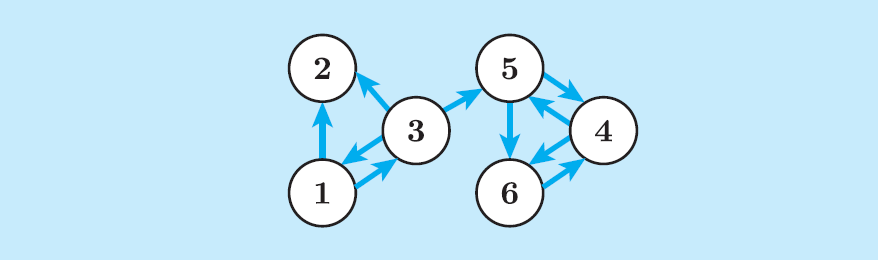

In [ ]:
import numpy as np
A=np.array([[0,0,1/3,0,0,0],
            [1/2,0,1/3,0,0,0],
            [1/2,0,0,0,0,0],
            [0,0,0,0,1/2,1],
            [0,0,1/3,1/2,0,0],
            [0,0,0,1/2,1/2,0]
            ])
A

array([[0.        , 0.        , 0.33333333, 0.        , 0.        ,
        0.        ],
       [0.5       , 0.        , 0.33333333, 0.        , 0.        ,
        0.        ],
       [0.5       , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.5       ,
        1.        ],
       [0.        , 0.        , 0.33333333, 0.5       , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.5       , 0.5       ,
        0.        ]])

In [ ]:
# 固有値, 固有ベクトルを求める
lm,v=np.linalg.eig(A)

In [ ]:
# 固有値
lm

array([ 0.        ,  1.        ,  0.40824829, -0.40824829, -0.5       ,
       -0.5       ])

In [ ]:
# 固有ベクトル
v

array([[ 0.00000000e+00, -8.90184239e-16,  3.53151314e-01,
        -6.44662694e-02, -5.79075548e-16,  5.91422496e-16],
       [ 1.00000000e+00, -4.27841672e-16,  7.85671574e-01,
         1.44884634e-02,  3.88425362e-16, -3.87065986e-16],
       [ 0.00000000e+00, -7.27552444e-16,  4.32520260e-01,
         7.89547328e-02,  6.38686266e-16, -6.13398464e-16],
       [ 0.00000000e+00, -7.42781353e-01, -2.07962839e-01,
        -6.56838918e-01,  7.07106779e-01, -7.07106783e-01],
       [ 0.00000000e+00, -3.71390676e-01,  9.84498926e-02,
         7.39993826e-01, -7.07106783e-01,  7.07106779e-01],
       [ 0.00000000e+00, -5.57086015e-01, -1.34125420e-01,
        -1.01843548e-01,  3.65754331e-09,  3.65754342e-09]])

In [ ]:
# 固有値1に対応する(lmの2番目(つまりindex=1))固有ベクトル
v[:,1].reshape(-1,1)

array([[-8.90184239e-16],
       [-4.27841672e-16],
       [-7.27552444e-16],
       [-7.42781353e-01],
       [-3.71390676e-01],
       [-5.57086015e-01]])

In [ ]:
# 固有値は定数倍することができるため, 全てマイナスの値の場合はマイナスをかけることができる
np.abs(v[:,1].reshape(-1,1))

# e-16は10^{-16}の意味(すごく小さい値)
# ページ4, 6, 5の順で高いことがわかる。

array([[8.90184239e-16],
       [4.27841672e-16],
       [7.27552444e-16],
       [7.42781353e-01],
       [3.71390676e-01],
       [5.57086015e-01]])

# 第4章：演習問題模範解答
- 下記のプログラムはサイン波で「ちょうちょ」を奏でるプログラムである. その音のデータがyに入っているためyについて短時間フーリエ変換を行い, 単位時間ごとの一番大きい音の周波数が入っている配列がxとなっている. 配列xを, np.diffを用いて, 一次微分, 二次微分を求め, 横軸は時間t, 縦軸はx, 一次微分値, 二次微分値を表すグラフを作成せよ.
- 音の周波数の一次微分, 二次微分は何を意味しているか考察せよ.

In [ ]:
import numpy as np
import IPython.display

def generate_tone(freq, duration, amplitude=1, fs=44100):
    t = np.arange(0, duration, 1/fs)
    return amplitude * np.sin(2 * np.pi * freq * t)

fs = 44100
base_freq = 440  # A4 (ラ)

# 音名とハーフステップの間の関係
# C4 (ド) = 0, D4 (レ) = 2, E4 (ミ) = 4, F4 (ファ) = 5, G4 (ソ) = 7, A4 (ラ) = 9
notes = [
    (7, 0.5), (4, 0.5), (4, 1.0),
    (5, 0.5), (2, 0.5), (2, 1.0),
    (0, 0.5), (2, 0.5), (4, 0.5), (5, 0.5), (7, 0.5), (7, 0.5), (7, 2.0),
    (7, 0.5), (4, 0.5), (4, 0.5), (4, 0.5), (5, 0.5), (2, 0.5), (2, 0.5), (2, 0.5),
    (0, 0.5), (4, 0.5), (7, 0.5), (7, 0.5), (4, 0.5), (4, 0.5), (4, 1.0)
]

y = np.array([])
for note, duration in notes:
    if note == -1:
        tone = np.zeros(int(fs*duration))
    else:
        freq = base_freq * 2 ** ((note - 9) / 12)
        tone = generate_tone(freq, duration)
    y = np.append(y, tone)

IPython.display.Audio(y, rate=fs)

In [ ]:
import librosa
import numpy as np

# 短時間フーリエ変換 (STFT) の実行
D = librosa.stft(y)

# 振幅スペクトルの計算 (複素数から絶対値を取る)
magnitude = np.abs(D)

# 各時間フレームでの最大振幅を持つ周波数成分を取得
dominant_freq_idx = np.argmax(magnitude, axis=0)

# 周波数ベクトルの計算
frequencies = librosa.fft_frequencies(sr=fs)

# 対応する実際の周波数の取得
x = frequencies[dominant_freq_idx]

# 結果の確認
print(x)

[387.59765625 387.59765625 387.59765625 ... 322.99804688 322.99804688
 322.99804688]


In [ ]:
x.shape

(1465,)

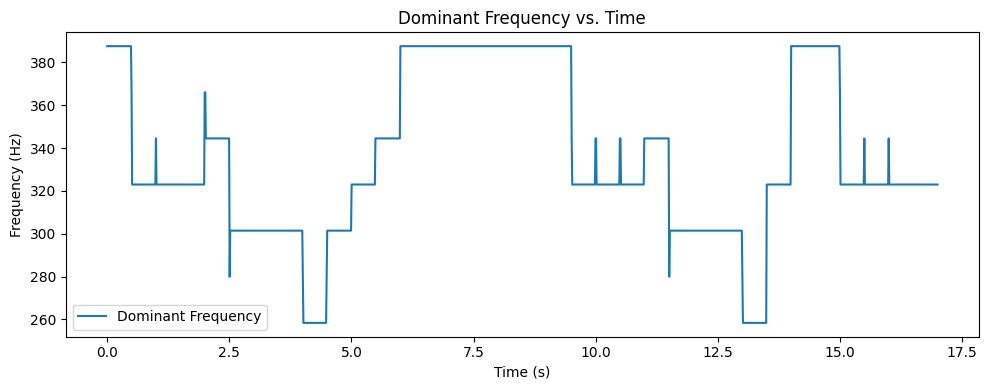

In [ ]:
import matplotlib.pyplot as plt
import librosa.display

times = librosa.frames_to_time(np.arange(D.shape[1]), sr=fs)

plt.figure(figsize=(10, 4))
plt.plot(times, x, label='Dominant Frequency')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Dominant Frequency vs. Time')
plt.legend()
plt.tight_layout()
plt.show()

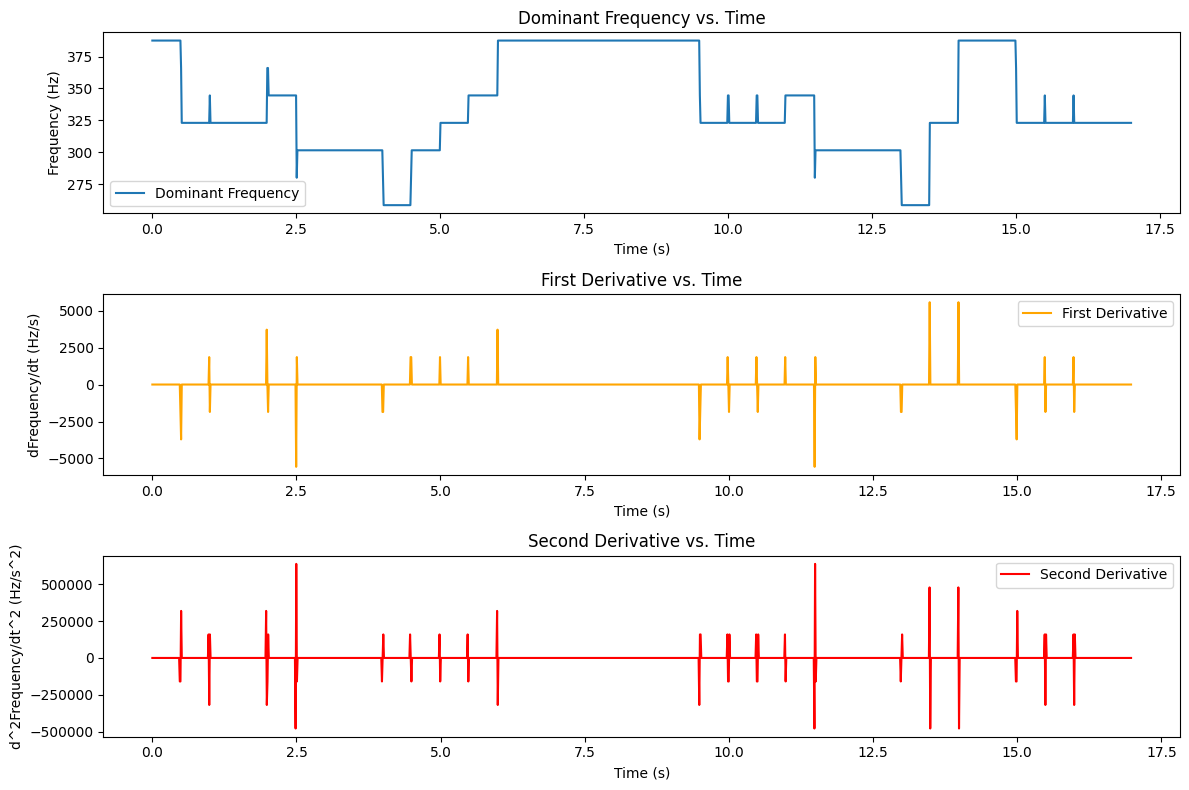

In [ ]:
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

# 一次微分
dx = np.diff(x) / np.diff(times)

# 二次微分
d2x = np.diff(dx) / np.diff(times[:-1])

# 新しい時間ベクトル
times_1 = times[:-1]  # 一次微分のための時間
times_2 = times[:-2]  # 二次微分のための時間

plt.figure(figsize=(12, 8))

# 元のデータを描画
plt.subplot(3, 1, 1)
plt.plot(times, x, label='Dominant Frequency')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Dominant Frequency vs. Time')
plt.legend()

# 一次微分を描画
plt.subplot(3, 1, 2)
plt.plot(times_1, dx, label='First Derivative', color='orange')
plt.xlabel('Time (s)')
plt.ylabel('dFrequency/dt (Hz/s)')
plt.title('First Derivative vs. Time')
plt.legend()

# 二次微分を描画
plt.subplot(3, 1, 3)
plt.plot(times_2, d2x, label='Second Derivative', color='red')
plt.xlabel('Time (s)')
plt.ylabel('d^2Frequency/dt^2 (Hz/s^2)')
plt.title('Second Derivative vs. Time')
plt.legend()

plt.tight_layout()
plt.show()

- xは音の高さの時間ごとの絶対値を表し, その一次微分はどれだけ変化したかの度合いを表し, 二次微分はどれだけ変化が急激であったかを示す度合いとなっている. 「ちょうちょ」は比較的単純な曲なため, 音が飛んでいるところのみ, 一次微分値と二次微分値の絶対値が大きくなっている.

# 第5章：演習問題模範解答
- $x^2+y^2-4=0$を満たす条件下で$x^2-2xy+4y^2$を最小化するPythonプログラムを組み, 答えを導き出せ.

In [ ]:
from sympy import *
import sympy as sym
sym.init_printing()

x, y, l = symbols('x y l')

f = x**2 - 2*x*y + 4*y**2
g = x**2 + y**2 - 4
L = f - l*g

# 各変数で偏微分する
diffx = diff(L, x)
diffy = diff(L, y)
diffl = diff(L, l)

# 連立方程式を解く
res = solve([diffx, diffy, diffl])
res

⎡⎧                 ____________                             ___________⎫  ⎧                 ______ ↪
⎢⎪   5   √13     ╲╱ 13 - 3⋅√13 ⋅(-13⋅√2 - 3⋅√26)           ╱ 1   3⋅√13 ⎪  ⎪   5   √13     ╲╱ 13 -  ↪
⎢⎨l: ─ - ───, x: ───────────────────────────────, y: -2⋅  ╱  ─ - ───── ⎬, ⎨l: ─ - ───, x: ──────── ↪
⎢⎪   2    2                    26                       ╲╱   2    26   ⎪  ⎪   2    2               ↪
⎣⎩                                                                     ⎭  ⎩                        ↪

↪ ______                           ___________⎫  ⎧                 ____________                    ↪
↪ 3⋅√13 ⋅(3⋅√26 + 13⋅√2)          ╱ 1   3⋅√13 ⎪  ⎪   √13   5     ╲╱ 3⋅√13 + 13 ⋅(-13⋅√2 + 3⋅√26)   ↪
↪ ──────────────────────, y: 2⋅  ╱  ─ - ───── ⎬, ⎨l: ─── + ─, x: ───────────────────────────────,  ↪
↪       26                     ╲╱   2    26   ⎪  ⎪    2    2                   26                  ↪
↪                                             ⎭  ⎩                                        

# 第6章：演習問題模範解答
- 次の関数$f(x)=x \sin⁡ x$について, $f(x)$を$[0,\pi]$ の間で積分するPythonプログラムを実装し, 答えを導出せよ.

In [ ]:
from sympy import *
import sympy as sym

sym.init_printing()

x = symbols('x')
f = x * sin(x)

integral_symbolic = integrate(f, (x, 0, pi))
integral_symbolic

π

# 第7章：演習問題模範解答
- from sklearn.datasets import load_wineでワインデータセットを例にして, ここまでIrisデータセットで行ってきたPythonプログラムの処理を全部試してみよ.

In [ ]:
from sklearn.datasets import load_wine
import pandas as pd
data = load_wine()
wine_df = pd.DataFrame(data.data, columns=data.feature_names)
labels=data.target
wine_labels = [data.target_names[label] for label in labels]
wine_df

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  
0                            3.92   1065.0  
1                            3.40   1050.0  
2                            3.17   1185.0  
3                            3.45   1480.0  
4                            2.93    735.0  
..                            ...      ...  
173                          1.74    740.0  
174                          1.56    750.0  
175                          1.56    835.0  
176                          1.62    840.0  
177                          1.60    560.0  

[178 rows x 13 columns]

In [ ]:
wine_df['alcohol'].mean()

13.00061797752809

In [ ]:
wine_df['alcohol'].median()

13.05

In [ ]:
wine_df['alcohol'].mode()

0    12.37
1    13.05
Name: alcohol, dtype: float64

In [ ]:
wine_df['alcohol'].var()

0.6590623278105759

In [ ]:
wine_df['alcohol'].var()

0.6590623278105759

In [ ]:
wine_df['alcohol'].std()

0.8118265380058575

In [ ]:
wine_df['alcohol'].std()

0.8118265380058575

In [ ]:
wine_df.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  
count       178.000000  178.000000                    178.000000   178.000000  
mean          5.058090    0.957449                      2.611685   746.893258  
std           2.318286    0.228572                      0.709990   314.907474  
min           1.280000    0.480000                      1.270000   278.000000  
25%           3.220000    0.782500                      1.937500   500.500000  
50%           4.690000    0.965000                      2.780000   673.500000  
75%           6.200000    1.120000                      3.170000   985.000000  
max          13.000000    1.710000                      4.000000  1680.000000

In [ ]:
# Min-Max normalization

from sklearn import preprocessing

mm = preprocessing.MinMaxScaler()
wine_df_minmax = pd.DataFrame(mm.fit_transform(wine_df), columns=data.feature_names)
wine_df_minmax

alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0    0.842105    0.191700  0.572193           0.257732   0.619565   
1    0.571053    0.205534  0.417112           0.030928   0.326087   
2    0.560526    0.320158  0.700535           0.412371   0.336957   
3    0.878947    0.239130  0.609626           0.319588   0.467391   
4    0.581579    0.365613  0.807487           0.536082   0.521739   
..        ...         ...       ...                ...        ...   
173  0.705263    0.970356  0.582888           0.510309   0.271739   
174  0.623684    0.626482  0.598930           0.639175   0.347826   
175  0.589474    0.699605  0.481283           0.484536   0.543478   
176  0.563158    0.365613  0.540107           0.484536   0.543478   
177  0.815789    0.664032  0.737968           0.716495   0.282609   

     total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0         0.627586    0.573840              0.283019         0.593060   
1         0.575862    0.510549              0.245283         0.274448   
2         0.627586    0.611814              0.320755         0.757098   
3         0.989655    0.664557              0.207547         0.558360   
4         0.627586    0.495781              0.490566         0.444795   
..             ...         ...                   ...              ...   
173       0.241379    0.056962              0.735849         0.205047   
174       0.282759    0.086498              0.566038         0.315457   
175       0.210345    0.073840              0.566038         0.296530   
176       0.231034    0.071730              0.754717         0.331230   
177       0.368966    0.088608              0.811321         0.296530   

     color_intensity       hue  od280/od315_of_diluted_wines   proline  
0           0.372014  0.455285                      0.970696  0.561341  
1           0.264505  0.463415                      0.780220  0.550642  
2           0.375427  0.447154                      0.695971  0.646933  
3           0.556314  0.308943                      0.798535  0.857347  
4           0.259386  0.455285                      0.608059  0.325963  
..               ...       ...                           ...       ...  
173         0.547782  0.130081                      0.172161  0.329529  
174         0.513652  0.178862                      0.106227  0.336662  
175         0.761092  0.089431                      0.106227  0.397290  
176         0.684300  0.097561                      0.128205  0.400856  
177         0.675768  0.105691                      0.120879  0.201141  

[178 rows x 13 columns]

In [ ]:
# Z-score normalization

from sklearn import preprocessing

ss = preprocessing.StandardScaler()
wine_df_zscore = pd.DataFrame(ss.fit_transform(wine_df), columns=data.feature_names)
wine_df_zscore

alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0    1.518613   -0.562250  0.232053          -1.169593   1.913905   
1    0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2    0.196879    0.021231  1.109334          -0.268738   0.088358   
3    1.691550   -0.346811  0.487926          -0.809251   0.930918   
4    0.295700    0.227694  1.840403           0.451946   1.281985   
..        ...         ...       ...                ...        ...   
173  0.876275    2.974543  0.305159           0.301803  -0.332922   
174  0.493343    1.412609  0.414820           1.052516   0.158572   
175  0.332758    1.744744 -0.389355           0.151661   1.422412   
176  0.209232    0.227694  0.012732           0.151661   1.422412   
177  1.395086    1.583165  1.365208           1.502943  -0.262708   

     total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0         0.808997    1.034819             -0.659563         1.224884   
1         0.568648    0.733629             -0.820719        -0.544721   
2         0.808997    1.215533             -0.498407         2.135968   
3         2.491446    1.466525             -0.981875         1.032155   
4         0.808997    0.663351              0.226796         0.401404   
..             ...         ...                   ...              ...   
173      -0.985614   -1.424900              1.274310        -0.930179   
174      -0.793334   -1.284344              0.549108        -0.316950   
175      -1.129824   -1.344582              0.549108        -0.422075   
176      -1.033684   -1.354622              1.354888        -0.229346   
177      -0.392751   -1.274305              1.596623        -0.422075   

     color_intensity       hue  od280/od315_of_diluted_wines   proline  
0           0.251717  0.362177                      1.847920  1.013009  
1          -0.293321  0.406051                      1.113449  0.965242  
2           0.269020  0.318304                      0.788587  1.395148  
3           1.186068 -0.427544                      1.184071  2.334574  
4          -0.319276  0.362177                      0.449601 -0.037874  
..               ...       ...                           ...       ...  
173         1.142811 -1.392758                     -1.231206 -0.021952  
174         0.969783 -1.129518                     -1.485445  0.009893  
175         2.224236 -1.612125                     -1.485445  0.280575  
176         1.834923 -1.568252                     -1.400699  0.296498  
177         1.791666 -1.524378                     -1.428948 -0.595160  

[178 rows x 13 columns]

In [ ]:
wine_df_zscore.describe()

alcohol    malic_acid           ash  alcalinity_of_ash  \
count  1.780000e+02  1.780000e+02  1.780000e+02       1.780000e+02   
mean   7.943708e-15  3.592632e-16 -4.066660e-15      -7.983626e-17   
std    1.002821e+00  1.002821e+00  1.002821e+00       1.002821e+00   
min   -2.434235e+00 -1.432983e+00 -3.679162e+00      -2.671018e+00   
25%   -7.882448e-01 -6.587486e-01 -5.721225e-01      -6.891372e-01   
50%    6.099988e-02 -4.231120e-01 -2.382132e-02       1.518295e-03   
75%    8.361286e-01  6.697929e-01  6.981085e-01       6.020883e-01   
max    2.259772e+00  3.109192e+00  3.156325e+00       3.154511e+00   

          magnesium  total_phenols    flavanoids  nonflavanoid_phenols  \
count  1.780000e+02   1.780000e+02  1.780000e+02          1.780000e+02   
mean  -7.983626e-17  -3.991813e-17  9.979533e-16         -5.588538e-16   
std    1.002821e+00   1.002821e+00  1.002821e+00          1.002821e+00   
min   -2.088255e+00  -2.107246e+00 -1.695971e+00         -1.868234e+00   
25%   -8.244151e-01  -8.854682e-01 -8.275393e-01         -7.401412e-01   
50%   -1.222817e-01   9.595986e-02  1.061497e-01         -1.760948e-01   
75%    5.096384e-01   8.089974e-01  8.490851e-01          6.095413e-01   
max    4.371372e+00   2.539515e+00  3.062832e+00          2.402403e+00   

       proanthocyanins  color_intensity           hue  \
count     1.780000e+02     1.780000e+02  1.780000e+02   
mean     -1.656602e-15    -3.442939e-16  1.636643e-15   
std       1.002821e+00     1.002821e+00  1.002821e+00   
min      -2.069034e+00    -1.634288e+00 -2.094732e+00   
25%      -5.972835e-01    -7.951025e-01 -7.675624e-01   
50%      -6.289785e-02    -1.592246e-01  3.312687e-02   
75%       6.291754e-01     4.939560e-01  7.131644e-01   
max       3.485073e+00     3.435432e+00  3.301694e+00   

       od280/od315_of_diluted_wines       proline  
count                  1.780000e+02  1.780000e+02  
mean                   2.235415e-15 -1.197544e-16  
std                    1.002821e+00  1.002821e+00  
min                   -1.895054e+00 -1.493188e+00  
25%                   -9.522483e-01 -7.846378e-01  
50%                    2.377348e-01 -2.337204e-01  
75%                    7.885875e-01  7.582494e-01  
max                    1.960915e+00  2.971473e+00

In [ ]:
from sklearn.datasets import load_wine
import numpy as np
import pandas as pd

# `alcohol`の最小値と最大値を取得
min_val = wine_df['alcohol'].min()
max_val = wine_df['alcohol'].max()

# 度数分布とその階級の下限
freq, item = np.histogram(wine_df['alcohol'], bins=10, range=(min_val, max_val))

# 階級の下限と上限
freq_class = [f'{i:.1f}~{j:.1f}' for i, j in zip(item[:-1], item[1:])]

# 階級値
class_value = [(i + j) / 2 for i, j in zip(item[:-1], item[1:])]

# 相対度数
rel_freq = freq / freq.sum()

# 累積相対度数
cum_rel_freq = np.cumsum(rel_freq)

# dataframeにまとめる
freq_dist_df = pd.DataFrame({
    '度数': freq,
    '階級値': class_value,
    '相対度数': rel_freq,
    '累積相対度数': cum_rel_freq
}, index=freq_class)
freq_dist_df

度数    階級値      相対度数    累積相対度数
11.0~11.4   1  11.22  0.005618  0.005618
11.4~11.8  10  11.60  0.056180  0.061798
11.8~12.2  19  11.98  0.106742  0.168539
12.2~12.5  31  12.36  0.174157  0.342697
12.5~12.9  21  12.74  0.117978  0.460674
12.9~13.3  27  13.12  0.151685  0.612360
13.3~13.7  25  13.50  0.140449  0.752809
13.7~14.1  25  13.88  0.140449  0.893258
14.1~14.4  17  14.26  0.095506  0.988764
14.4~14.8   2  14.64  0.011236  1.000000

In [ ]:
%%capture
!pip install japanize-matplotlib

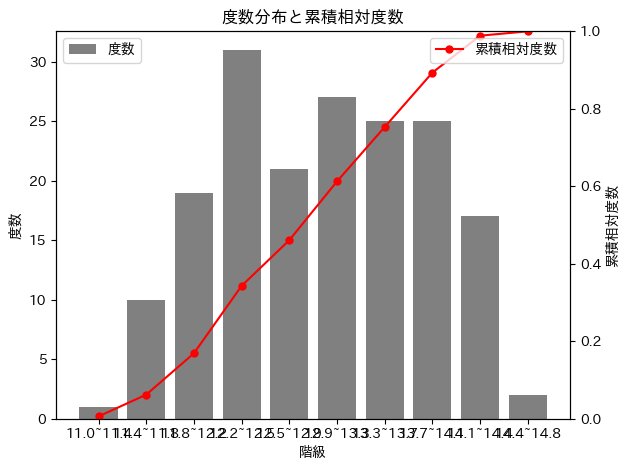

In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib

# フィギュアと軸の設定
fig, ax1 = plt.subplots()

# 左のy軸（度数用）のヒストグラムの描画
ax1.bar(freq_dist_df.index, freq_dist_df['度数'], width=0.8, color='gray', align='center', label='度数')
ax1.set_ylabel('度数')
ax1.set_xlabel('階級')
ax1.set_title('度数分布と累積相対度数')
ax1.legend(loc='upper left')

# 右のy軸（累積相対度数用）の設定
ax2 = ax1.twinx()
ax2.plot(freq_dist_df.index, freq_dist_df['累積相対度数'], color='red', marker='o', linestyle='-', markersize=5, label='累積相対度数')
ax2.set_ylabel('累積相対度数')
ax2.set_ylim(0, 1)  # y軸の範囲を0から1に設定
ax2.legend(loc='upper right')

# x軸のラベルを45度回転
plt.xticks(rotation=45)

# グラフの表示
plt.tight_layout()
plt.show()

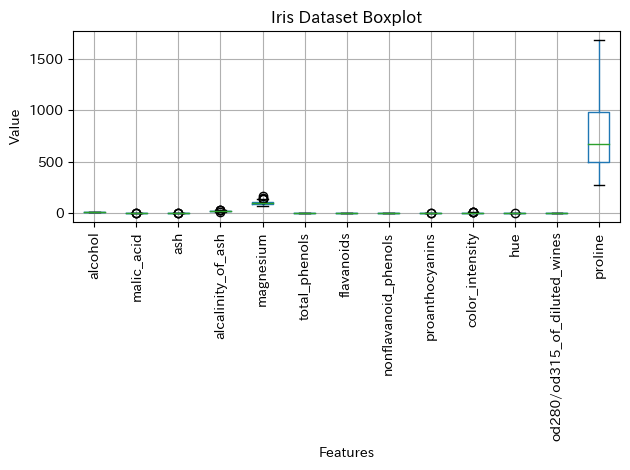

In [ ]:
import matplotlib.pyplot as plt

# 箱ひげ図の描画
wine_df.boxplot()

# グラフのタイトルと軸ラベルの設定
plt.title('Iris Dataset Boxplot')
plt.ylabel('Value')
plt.xlabel('Features')
plt.xticks(rotation=90)  # x軸のラベルを45度回転

# グラフの表示
plt.tight_layout()
plt.show()

In [ ]:
wine_df.cov()

alcohol  malic_acid        ash  \
alcohol                         0.659062    0.085611   0.047115   
malic_acid                      0.085611    1.248015   0.050277   
ash                             0.047115    0.050277   0.075265   
alcalinity_of_ash              -0.841093    1.076332   0.406208   
magnesium                       3.139878   -0.870780   1.122937   
total_phenols                   0.146887   -0.234338   0.022146   
flavanoids                      0.192033   -0.458630   0.031535   
nonflavanoid_phenols           -0.015754    0.040733   0.006358   
proanthocyanins                 0.063518   -0.141147   0.001516   
color_intensity                 1.028283    0.644838   0.164654   
hue                            -0.013313   -0.143326  -0.004682   
od280/od315_of_diluted_wines    0.041698   -0.292447   0.000762   
proline                       164.567185  -67.548867  19.319739   

                              alcalinity_of_ash    magnesium  total_phenols  \
alcohol                               -0.841093     3.139878       0.146887   
malic_acid                             1.076332    -0.870780      -0.234338   
ash                                    0.406208     1.122937       0.022146   
alcalinity_of_ash                     11.152686    -3.974760      -0.671149   
magnesium                             -3.974760   203.989335       1.916470   
total_phenols                         -0.671149     1.916470       0.391690   
flavanoids                            -1.172083     2.793087       0.540470   
nonflavanoid_phenols                   0.150422    -0.455563      -0.035045   
proanthocyanins                       -0.377176     1.932832       0.219373   
color_intensity                        0.145024     6.620521      -0.079998   
hue                                   -0.209118     0.180851       0.062039   
od280/od315_of_diluted_wines          -0.656234     0.669308       0.311021   
proline                             -463.355345  1769.158700      98.171057   

                              flavanoids  nonflavanoid_phenols  \
alcohol                         0.192033             -0.015754   
malic_acid                     -0.458630              0.040733   
ash                             0.031535              0.006358   
alcalinity_of_ash              -1.172083              0.150422   
magnesium                       2.793087             -0.455563   
total_phenols                   0.540470             -0.035045   
flavanoids                      0.997719             -0.066867   
nonflavanoid_phenols           -0.066867              0.015489   
proanthocyanins                 0.373148             -0.026060   
color_intensity                -0.399169              0.040121   
hue                             0.124082             -0.007471   
od280/od315_of_diluted_wines    0.558262             -0.044469   
proline                       155.447492            -12.203586   

                              proanthocyanins  color_intensity        hue  \
alcohol                              0.063518         1.028283  -0.013313   
malic_acid                          -0.141147         0.644838  -0.143326   
ash                                  0.001516         0.164654  -0.004682   
alcalinity_of_ash                   -0.377176         0.145024  -0.209118   
magnesium                            1.932832         6.620521   0.180851   
total_phenols                        0.219373        -0.079998   0.062039   
flavanoids                           0.373148        -0.399169   0.124082   
nonflavanoid_phenols                -0.026060         0.040121  -0.007471   
proanthocyanins                      0.327595        -0.033504   0.038665   
color_intensity                     -0.033504         5.374449  -0.276506   
hue                                  0.038665        -0.276506   0.052245   
od280/od315_of_diluted_wines         0.210933        -0.705813   0.091766   
proline                             59.554334       230.76748

In [ ]:
wine_df.corr()

alcohol  malic_acid       ash  \
alcohol                       1.000000    0.094397  0.211545   
malic_acid                    0.094397    1.000000  0.164045   
ash                           0.211545    0.164045  1.000000   
alcalinity_of_ash            -0.310235    0.288500  0.443367   
magnesium                     0.270798   -0.054575  0.286587   
total_phenols                 0.289101   -0.335167  0.128980   
flavanoids                    0.236815   -0.411007  0.115077   
nonflavanoid_phenols         -0.155929    0.292977  0.186230   
proanthocyanins               0.136698   -0.220746  0.009652   
color_intensity               0.546364    0.248985  0.258887   
hue                          -0.071747   -0.561296 -0.074667   
od280/od315_of_diluted_wines  0.072343   -0.368710  0.003911   
proline                       0.643720   -0.192011  0.223626   

                              alcalinity_of_ash  magnesium  total_phenols  \
alcohol                               -0.310235   0.270798       0.289101   
malic_acid                             0.288500  -0.054575      -0.335167   
ash                                    0.443367   0.286587       0.128980   
alcalinity_of_ash                      1.000000  -0.083333      -0.321113   
magnesium                             -0.083333   1.000000       0.214401   
total_phenols                         -0.321113   0.214401       1.000000   
flavanoids                            -0.351370   0.195784       0.864564   
nonflavanoid_phenols                   0.361922  -0.256294      -0.449935   
proanthocyanins                       -0.197327   0.236441       0.612413   
color_intensity                        0.018732   0.199950      -0.055136   
hue                                   -0.273955   0.055398       0.433681   
od280/od315_of_diluted_wines          -0.276769   0.066004       0.699949   
proline                               -0.440597   0.393351       0.498115   

                              flavanoids  nonflavanoid_phenols  \
alcohol                         0.236815             -0.155929   
malic_acid                     -0.411007              0.292977   
ash                             0.115077              0.186230   
alcalinity_of_ash              -0.351370              0.361922   
magnesium                       0.195784             -0.256294   
total_phenols                   0.864564             -0.449935   
flavanoids                      1.000000             -0.537900   
nonflavanoid_phenols           -0.537900              1.000000   
proanthocyanins                 0.652692             -0.365845   
color_intensity                -0.172379              0.139057   
hue                             0.543479             -0.262640   
od280/od315_of_diluted_wines    0.787194             -0.503270   
proline                         0.494193             -0.311385   

                              proanthocyanins  color_intensity       hue  \
alcohol                              0.136698         0.546364 -0.071747   
malic_acid                          -0.220746         0.248985 -0.561296   
ash                                  0.009652         0.258887 -0.074667   
alcalinity_of_ash                   -0.197327         0.018732 -0.273955   
magnesium                            0.236441         0.199950  0.055398   
total_phenols                        0.612413        -0.055136  0.433681   
flavanoids                           0.652692        -0.172379  0.543479   
nonflavanoid_phenols                -0.365845         0.139057 -0.262640   
proanthocyanins                      1.000000        -0.025250  0.295544   
color_intensity                     -0.025250         1.000000 -0.521813   
hue                                  0.295544        -0.521813  1.000000   
od280/od315_of_diluted_wines         0.519067        -0.428815  0.565468   
proline                              0.330417         0.316100  0.236183   

                              od280/od315_of_diluted_wines   prol

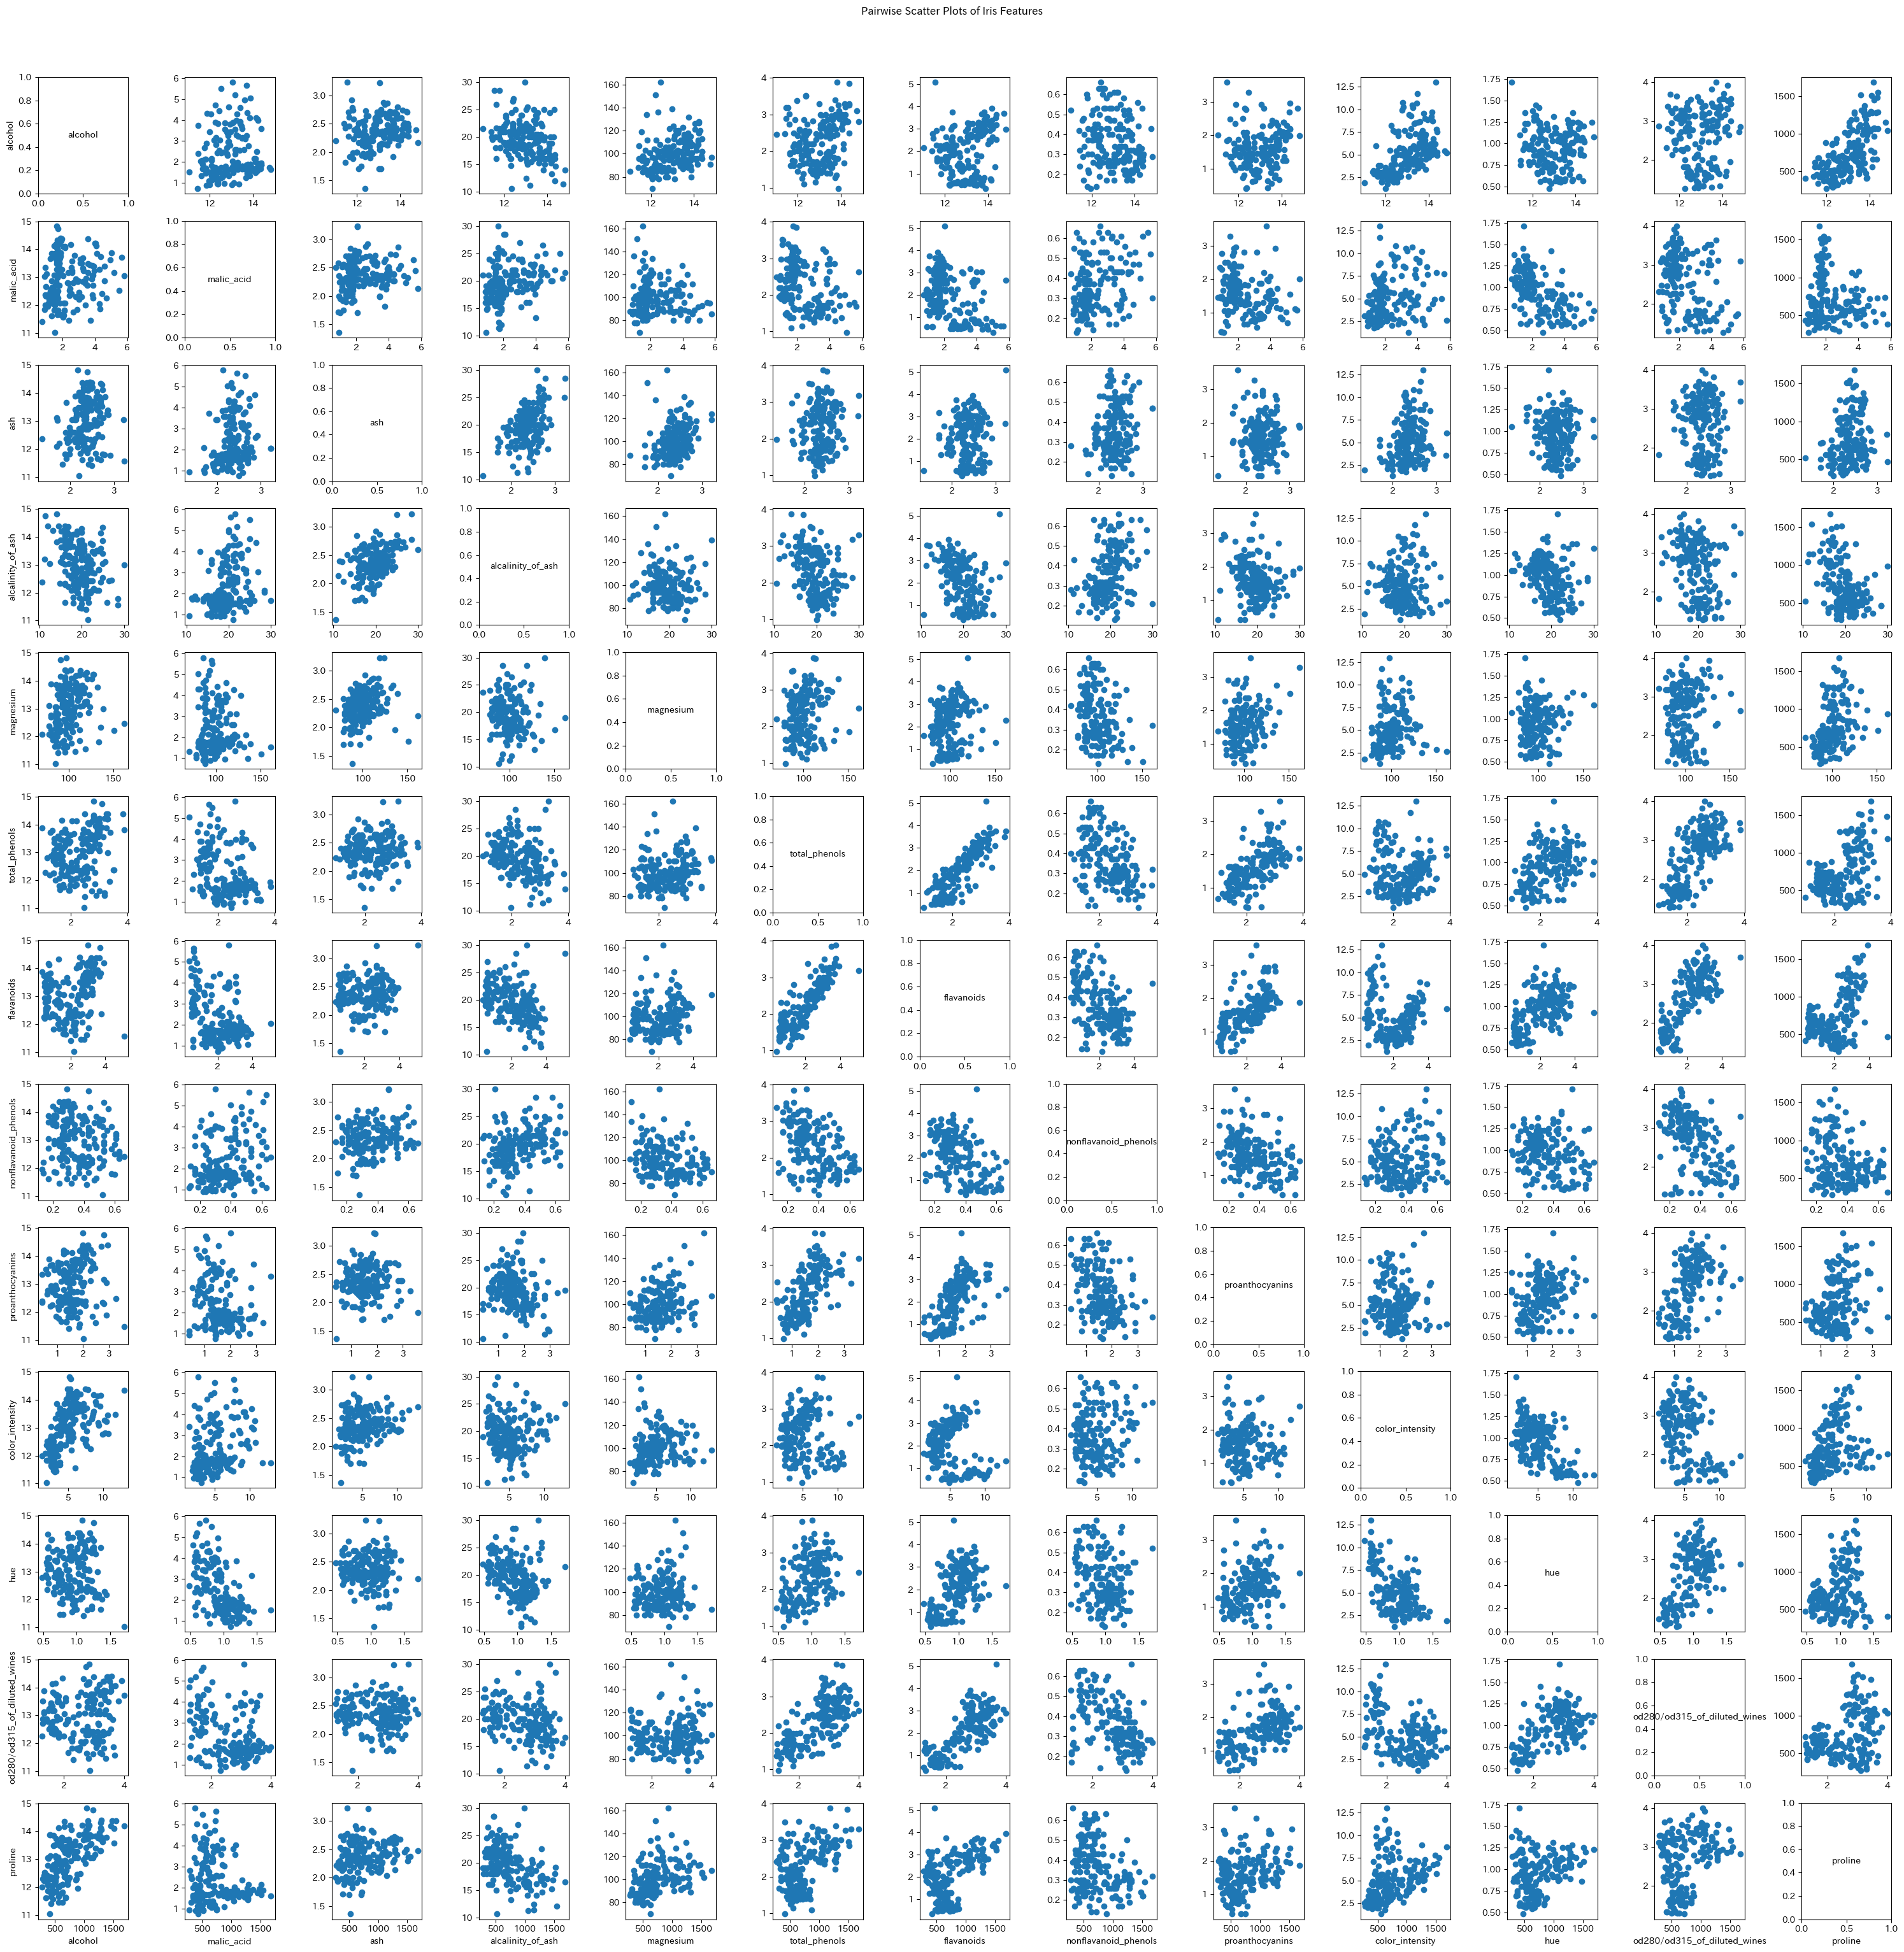

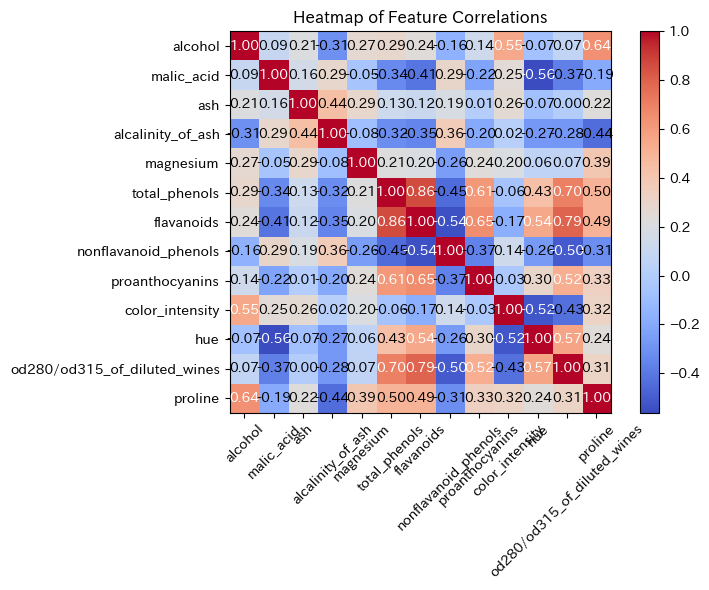

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 散布図の描画
features = wine_df.columns
n_features = len(features)

plt.figure(figsize=(30, 30))
for i in range(n_features):
    for j in range(n_features):
        plt.subplot(n_features, n_features, i * n_features + j + 1)
        if i != j:
            plt.scatter(wine_df[features[i]], wine_df[features[j]])
        else:
            plt.text(0.5, 0.5, features[i], ha='center', va='center')
        if i == n_features - 1:
            plt.xlabel(features[j])
        if j == 0:
            plt.ylabel(features[i])
plt.suptitle('Pairwise Scatter Plots of Iris Features', y=1.02)
plt.tight_layout()
plt.show()

# ヒートマップの描画
correlation_matrix = wine_df.corr().values
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title('Heatmap of Feature Correlations')
plt.xticks(np.arange(n_features), features, rotation=45)
plt.yticks(np.arange(n_features), features)
for i in range(n_features):
    for j in range(n_features):
        plt.text(j, i, f"{correlation_matrix[i, j]:.2f}", ha='center', va='center', color='white' if abs(correlation_matrix[i, j]) > 0.5 else 'black')
plt.tight_layout()
plt.show()

# 第8章：演習問題模範解答
- 本講で行ったPythonプログラムの処理を「吾輩は猫である」や「蜘蛛の糸」でも試してみよ.
  - 本模範解答では「吾輩は猫である」で行う

- 吾輩は猫である
  - https://www.aozora.gr.jp/cards/000148/card789.html

In [ ]:
import requests
import zipfile
import io
import pandas as pd
import re

# ZIPファイルをダウンロード
url = "https://www.aozora.gr.jp/cards/000148/files/789_ruby_5639.zip"
response = requests.get(url)
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    # ZIP内のテキストファイル名を取得
    file_name = z.namelist()[0]
    with z.open(file_name, 'r') as f:
        text = f.read().decode('shift-jis')

# ルビや説明を削除
text = re.sub(r'《[^》]+》', '', text)
text = re.sub(r'［[^］]+］', '', text)
text = re.sub(r'-----[\s\S]*?-----', '', text)
text = re.sub(r'\r\n', '', text)  # 改行文字の削除
text = re.sub(r'「）', '', text)  # 「）の削除
text = re.sub(r'底本：「[^」]+」', '', text)  # 底本の情報を削除
text = re.sub(r'入力、校正、制作にあたったのは、ボランティアの皆さんです。', '', text)  # 末尾の文を削除

# 本文を1文ずつDataFrameに格納
sentences = re.split(r'(?<=[。！？])', text)
neko_df = pd.DataFrame(sentences, columns=['text'])
neko_df = neko_df[neko_df['text'].str.strip() != '']
neko_df

text
0                                 吾輩は猫である夏目漱石一　吾輩は猫である。
1                                              名前はまだ無い。
2                                    　どこで生れたかとんと見当がつかぬ。
3                  何でも薄暗いじめじめした所でニャーニャー泣いていた事だけは記憶している。
4                                  吾輩はここで始めて人間というものを見た。
...                                                 ...
7632                                     太平は死ななければ得られぬ。
7633                                      南無阿弥陀仏南無阿弥陀仏。
7634                                        ありがたいありがたい。
7635  ちくま文庫、筑摩書房　　　1987（昭和62）年9月29日第1刷発行底本の親本：「筑摩全集類...
7636  入力：柴田卓治校正：渡部峰子（一）、おのしげひこ（二、五）、田尻幹二（三）、高橋真也（四、七...

[7637 rows x 1 columns]

In [ ]:
%%capture
!pip install sudachipy sudachidict_core

In [ ]:
# テキストデータを形態素解析
from sudachipy import Dictionary
from collections import Counter

tokenizer = Dictionary().create()

words = []
for sentence in neko_df['text']:
    words.extend([m.dictionary_form() for m in tokenizer.tokenize(sentence)])  # 原型を取得

# 各単語の出現回数をカウント
word_counts = Counter(words)

# 各単語の出現確率を計算
total_words = len(words)
word_probabilities = {word: count / total_words for word, count in word_counts.items()}

# 出現確率をDataFrameに変換
prob_df = pd.DataFrame(list(word_probabilities.items()), columns=['Word', 'Probability'])
prob_df

Word  Probability
0          吾輩     0.002316
1           は     0.031171
2           猫     0.001144
3           だ     0.039749
4          ある     0.011034
...       ...          ...
12641    www.     0.000005
12642  aozora     0.000005
12643      gr     0.000005
12644      JP     0.000005
12645       /     0.000005

[12646 rows x 2 columns]

In [ ]:
# 事象の加法公理
prob_w1 = word_probabilities.get('猫', 0)
prob_w2 = word_probabilities.get('吾輩', 0)
prob_w12 = prob_w1 + prob_w2

# 乗法公理（2つの単語が同じ文中で連続して出現するかどうかを確認する）
consecutive_prob = 0
for sentence in neko_df['text']:
    if '猫' in sentence and '吾輩' in sentence:
        # ここでは, 単純に2つの単語の出現確率を掛け合わせています。
        consecutive_prob += prob_w1 * prob_w2

print(f"「猫」または「吾輩」が出現する確率: {prob_w12}")
print(f"「猫」と「吾輩」が同じ文中で連続して出現する確率: {consecutive_prob}")

「猫」または「吾輩」が出現する確率: 0.0034602242417543336
「猫」と「吾輩」が同じ文中で連続して出現する確率: 0.0001589713058169775


In [ ]:
# 事象の加法公理
prob_w1 = word_probabilities.get('猫', 0)
prob_w2 = word_probabilities.get('で', 0)
prob_w12 = prob_w1 + prob_w2

# 乗法公理（2つの単語が同じ文中で連続して出現するかどうかを確認する）
consecutive_prob = 0
for sentence in neko_df['text']:
    if '猫' in sentence and 'で' in sentence:
        # ここでは, 単純に2つの単語の出現確率を掛け合わせています。
        consecutive_prob += prob_w1 * prob_w2

print(f"「猫」または「で」が出現する確率: {prob_w12}")
print(f"「猫」と「で」が同じ文中で連続して出現する確率: {consecutive_prob}")

「猫」または「で」が出現する確率: 0.013336280931761493
「猫」と「で」が同じ文中で連続して出現する確率: 0.0020081835826938


In [ ]:
w1= '吾輩'
w2='猫'

# 「暴君」が出現した後に「ディオニス」が出現する回数をカウント
count_w12 = sum(1 for i in range(len(words) - 1) if words[i] == w1 and words[i + 1] == w2)

# 「暴君」が出現する回数をカウント
count_w1 = words.count(w1)

# 「暴君」が出現する確率
prob_w1 = count_w1 / total_words

# 条件付き確率を計算
conditional_prob = count_w12 / count_w1

print(f"「吾輩」が出現した後に「猫」が出現する確率: {conditional_prob}")

# 「ディオニス」が出現する確率
prob_w2 = word_probabilities.get(w2, 0)

# ベイズの定理を使用して条件付き確率を計算
bayes_prob = (conditional_prob * prob_w1) / prob_w2

print(f"「吾輩」が出現した場合, その前に「猫」が出現していた確率: {bayes_prob}")


「吾輩」が出現した後に「猫」が出現する確率: 0.004149377593360996
「吾輩」が出現した場合, その前に「猫」が出現していた確率: 0.008403361344537813


# 第9章：演習問題模範解答
- ある入試の点数は平均μ=60点, 標準偏差σ=10点の正規分布に従うとされている. 以下の問いをPythonプログラムを組んで導出せよ。
  - 80点以上を取る生徒の割合は何%か.
  - 上位10%の生徒が何点以上取得しているか.
  - 30点から70点までの生徒の割合は何%か.
  - 点数が20点以下または80点以上の生徒の割合は何%か.

In [ ]:
import scipy.stats as stats

# 平均と標準偏差
mu = 60
sigma = 10

# 1. 80点以上を取る生徒の割合
prob_80_or_more = 1 - stats.norm.cdf(80, mu, sigma)
print(f"1. 80点以上を取る生徒の割合: {prob_80_or_more * 100:.2f}%")

# 2. 上位10%の生徒が何点以上取得しているか？
top_10_percent_score = stats.norm.ppf(0.90, mu, sigma)
print(f"2. 上位10%の生徒が取得する点数: {top_10_percent_score:.2f}点")

# 3. 30点から70点までの生徒の割合
prob_30_to_70 = stats.norm.cdf(70, mu, sigma) - stats.norm.cdf(30, mu, sigma)
print(f"3. 30点から70点までの生徒の割合: {prob_30_to_70 * 100:.2f}%")

# 4. 点数が20点以下または８0点以上の生徒の割合
# 注意: 30点以上とするなら, cdf(30)を減算するのではなく, 1からそれを引く必要があります。
prob_less_20_or_more_80 = stats.norm.cdf(20, mu, sigma) + (1 - stats.norm.cdf(80, mu, sigma))
print(f"4. 20点以下または80点以上の生徒の割合: {prob_less_20_or_more_80 * 100:.2f}%")

1. 80点以上を取る生徒の割合: 2.28%
2. 上位10%の生徒が取得する点数: 72.82点
3. 30点から70点までの生徒の割合: 84.00%
4. 20点以下または80点以上の生徒の割合: 2.28%


# 第10章：演習問題模範解答
- ある新しい薬が治療に効果的かどうかを評価するための臨床試験を行った. 2つのグループ, つまり薬を投与するグループ（治療群）とプラセボを投与するグループ（対照群）に分けて試験を行う. 治療群での回復率と対照群での回復率の差を評価する.
その結果,
- 治療群: 100人中80人が回復
- 対照群: 100人中30人が回復
- このデータから, 薬の効果（治療群と対照群の回復率の差）を評価せよ。

In [ ]:
import pymc as pm

# データ
recovered_treatment = 80
total_treatment = 100
recovered_control = 30
total_control = 100

with pm.Model() as model:
    # 事前分布
    p_treatment = pm.Beta('p_treatment', alpha=2, beta=2)
    p_control = pm.Beta('p_control', alpha=2, beta=2)

    # 尤度関数
    likelihood_treatment = pm.Binomial('likelihood_treatment', n=total_treatment, p=p_treatment, observed=recovered_treatment)
    likelihood_control = pm.Binomial('likelihood_control', n=total_control, p=p_control, observed=recovered_control)

    # 薬の効果
    diff = pm.Deterministic('diff', p_treatment - p_control)

    # サンプリング
    trace = pm.sample(2000, tune=1000, chains=2)

In [ ]:
# 結果の表示
pm.summary(trace)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
p_treatment  0.788  0.041   0.713    0.864      0.001    0.000    4183.0   
p_control    0.308  0.046   0.229    0.397      0.001    0.000    4162.0   
diff         0.480  0.061   0.367    0.592      0.001    0.001    4022.0   

             ess_tail  r_hat  
p_treatment    2501.0    1.0  
p_control      3115.0    1.0  
diff           2958.0    1.0

array([<Axes: title={'center': 'p_treatment'}>,
       <Axes: title={'center': 'p_control'}>,
       <Axes: title={'center': 'diff'}>], dtype=object)

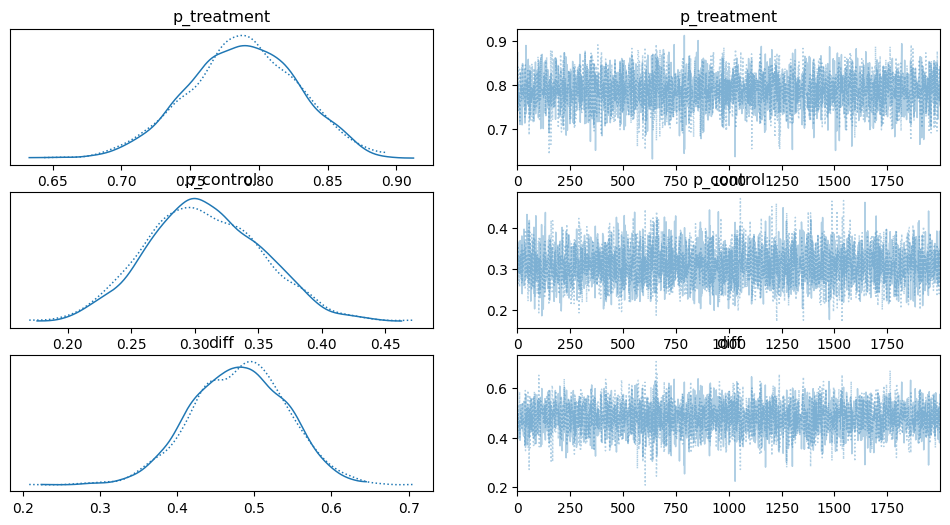

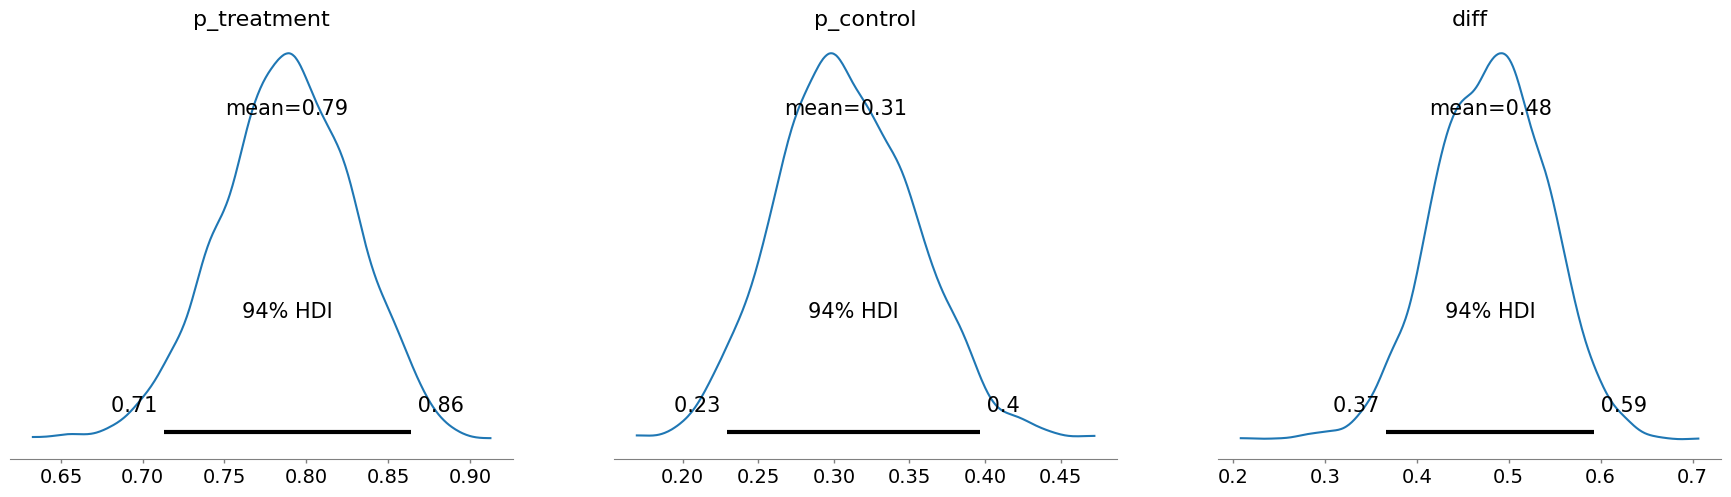

In [ ]:
import arviz as az

az.plot_trace(trace)
az.plot_posterior(trace)

# 第11章：演習問題模範解答
- Irisデータセットには3つの異なる品種 (setosa, versicolor, virginica) のアヤメの花に関するデータが含まれている. これらの品種のそれぞれについて, 花弁の長さ (petal length) の確率分布が与えられると考える. ジェンセン・シャノン情報量を用いて, 3つの品種の花弁の長さの確率分布の類似性を評価し, 最も類似している2つの品種をPythonプログラムをして求めよ.

In [ ]:
import numpy as np
from sklearn import datasets
import scipy.stats as stats

iris = datasets.load_iris()
data = iris.data
target = iris.target

# 花弁の長さを取得
petal_length = data[:, 2]

# 各品種の花弁の長さの確率分布を推定する関数
def estimate_distribution(petal_length, target, species_idx, bins):
    return np.histogram(petal_length[target == species_idx], bins=bins, density=True)[0]

# ジェンセン・シャノン情報量を計算する関数
def JSD(P, Q):
    M = 0.5 * (P + Q)
    return 0.5 * stats.entropy(P, M) + 0.5 * stats.entropy(Q, M)

# 確率分布を推定
bins = np.linspace(min(petal_length), max(petal_length), 30)
dist_setosa = estimate_distribution(petal_length, target, 0, bins)
dist_versicolor = estimate_distribution(petal_length, target, 1, bins)
dist_virginica = estimate_distribution(petal_length, target, 2, bins)

# 各品種の確率分布の類似性を評価
JSD_setosa_versicolor = JSD(dist_setosa, dist_versicolor)
JSD_setosa_virginica = JSD(dist_setosa, dist_virginica)
JSD_versicolor_virginica = JSD(dist_versicolor, dist_virginica)

print(f"JSD between Setosa and Versicolor: {JSD_setosa_versicolor:.4f}")
print(f"JSD between Setosa and Virginica: {JSD_setosa_virginica:.4f}")
print(f"JSD between Versicolor and Virginica: {JSD_versicolor_virginica:.4f}")

JSD_values = {"Setosa-Versicolor": JSD_setosa_versicolor, "Setosa-Virginica": JSD_setosa_virginica, "Versicolor-Virginica": JSD_versicolor_virginica}
most_similar = min(JSD_values, key=JSD_values.get)
print(f"\nThe most similar species based on petal length are: {most_similar}")

JSD between Setosa and Versicolor: 0.6931
JSD between Setosa and Virginica: 0.6931
JSD between Versicolor and Virginica: 0.5222

The most similar species based on petal length are: Versicolor-Virginica


# 第12章：演習問題模範解答
- from sklearn.datasets import load_diabetesのDiabetes(糖尿病)データセットを用いて, 通常の線形回帰, Ridge回帰, Lasso回帰の違いをPythonプログラムによって示し, 考察をせよ.

           Linear Regression        Ridge        Lasso
MSE              2821.750981  3112.966415  3444.670825
Feature 0          29.254013    45.054210     0.000000
Feature 1        -261.706469   -71.947397    -0.000000
Feature 2         546.299723   280.716252   443.703388
Feature 3         388.398341   195.212662    51.601094
Feature 4        -901.959668    -2.229303     0.000000
Feature 5         506.763241   -17.540797     0.000000
Feature 6         121.154351  -148.688862    -0.000000
Feature 7         288.035267   120.467240     0.000000
Feature 8         659.268951   198.614401   201.966478
Feature 9          41.376701   106.934692     0.000000


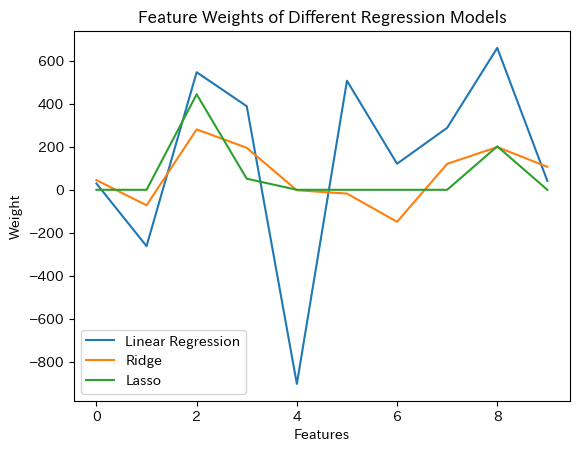

In [ ]:
# 必要なライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

# データの読み込み
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# データを訓練セットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# モデルの学習と評価
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=1.0)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.coef_
    mse = mean_squared_error(y_test, model.predict(X_test))

    results[name] = [mse] + list(predictions)

# 結果の表示
df = pd.DataFrame(results, index=["MSE"] + [f"Feature {i}" for i in range(X.shape[1])])
print(df)

# 可視化
for name, values in results.items():
    plt.plot(values[1:], label=name)

plt.title("Feature Weights of Different Regression Models")
plt.xlabel("Features")
plt.ylabel("Weight")
plt.legend()
plt.show()

- モデルの性能としては今回の場合MSEがLinear Regressionが最も低いため, このデータセットの場合は, 通常の線形回帰が最も良い性能を持っていると言える.
- Lasso回帰は特徴選択の性質を持っている. 多くの特徴が0の重みになっている.
- 一方, Ridge回帰は特徴の重みを小さくする性質がある.
- Feature 4とFeature 5に関して, 線形回帰モデルは非常に大きな重みを持っているのに対し, Ridge回帰ではこれらの重みが大きく低下している. これは, これらの特徴が線形回帰モデルにおいて過学習の原因となっている可能性を示唆している.
- LassoとRidgeは共に正則化項を持つため, 過学習を防ぐ役割がある, このデータセットの場合, 通常の線形回帰が最も良い性能を示したが, 他のデータセットや異なる設定の場合, RidgeやLassoの方が良い性能を示すことも考えられる.

# 第13章：演習問題模範解答
- 東京の1875年6月から最新までの月別平均気温データを気象庁のページ(https://www.data.jma.go.jp/obd/stats/etrn/view/monthly_s3.php?prec_no=44&block_no=47662 )から取得し, その周期性をフーリエ変換を使って分析するPythonプログラムを構築し, 結果を考察せよ.

In [ ]:
import pandas as pd

url = 'https://www.data.jma.go.jp/obd/stats/etrn/view/monthly_s3.php?prec_no=44&block_no=47662'
dfs = pd.read_html(url)
dfs

[        年   1月     2月    3月    4月    5月      6月      7月    8月      9月     10月  \
 0    1875  NaN    NaN   NaN   NaN   NaN  22.3 ]  26.0 )  24.9    21.5    15.3   
 1    1876  1.6  3.4 )   8.1  12.2  17.0    18.5    24.3  26.6  22.6 )  14.8 )   
 2    1877  3.2    3.6   6.2  13.6  16.5    22.0    26.5  25.9    21.3    15.9   
 3    1878  2.3    2.5   7.2  11.5  18.3    20.0    26.0  24.6    22.8    15.8   
 4    1879  3.2    5.4   8.0  12.6  18.0  21.4 )    26.1  26.6    21.3    15.0   
 ..    ...  ...    ...   ...   ...   ...     ...     ...   ...     ...     ...   
 145  2020  7.1    8.3  10.7  12.8  19.5    23.2    24.3  29.1    24.2    17.5   
 146  2021  5.4    8.5  12.8  15.1  19.6    22.7    25.9  27.4    22.3    18.2   
 147  2022  4.9    5.2  10.9  15.3  18.8    23.0    27.4  27.5    24.4    17.2   
 148  2023  5.7    7.3  12.9  16.3  19.0    23.2    28.7  29.2    26.7    18.9   
 149  2024  7.1    8.0   9.6  17.1  20.0    23.1  27.5 ]   NaN     NaN     NaN   
 
        11月  1

In [ ]:
len(dfs)

2

In [ ]:
dfs[0]

年   1月     2月    3月    4月    5月      6月      7月    8月      9月     10月  \
0    1875  NaN    NaN   NaN   NaN   NaN  22.3 ]  26.0 )  24.9    21.5    15.3   
1    1876  1.6  3.4 )   8.1  12.2  17.0    18.5    24.3  26.6  22.6 )  14.8 )   
2    1877  3.2    3.6   6.2  13.6  16.5    22.0    26.5  25.9    21.3    15.9   
3    1878  2.3    2.5   7.2  11.5  18.3    20.0    26.0  24.6    22.8    15.8   
4    1879  3.2    5.4   8.0  12.6  18.0  21.4 )    26.1  26.6    21.3    15.0   
..    ...  ...    ...   ...   ...   ...     ...     ...   ...     ...     ...   
145  2020  7.1    8.3  10.7  12.8  19.5    23.2    24.3  29.1    24.2    17.5   
146  2021  5.4    8.5  12.8  15.1  19.6    22.7    25.9  27.4    22.3    18.2   
147  2022  4.9    5.2  10.9  15.3  18.8    23.0    27.4  27.5    24.4    17.2   
148  2023  5.7    7.3  12.9  16.3  19.0    23.2    28.7  29.2    26.7    18.9   
149  2024  7.1    8.0   9.6  17.1  20.0    23.1  27.5 ]   NaN     NaN     NaN   

       11月  12月     年の値  
0    9.7 )  4.6  17.0 ]  
1      9.1  4.8    13.6  
2      9.6  5.8    14.2  
3      9.7  5.1    13.8  
4      9.7  8.0    14.6  
..     ...  ...     ...  
145   14.0  7.7    16.5  
146   13.7  7.9    16.6  
147   14.5  7.5    16.4  
148   14.4  9.4    17.6  
149    NaN  NaN  14.2 ]  

[150 rows x 14 columns]

In [ ]:
dfs[1]

0            1          2           3
0  利用される方へ  よくある質問（FAQ）  気象観測統計の解説  年・季節・各月の天候

- dfs[0]が正しく取得できている

In [ ]:
df=dfs[0]
df

年   1月     2月    3月    4月    5月      6月      7月    8月      9月     10月  \
0    1875  NaN    NaN   NaN   NaN   NaN  22.3 ]  26.0 )  24.9    21.5    15.3   
1    1876  1.6  3.4 )   8.1  12.2  17.0    18.5    24.3  26.6  22.6 )  14.8 )   
2    1877  3.2    3.6   6.2  13.6  16.5    22.0    26.5  25.9    21.3    15.9   
3    1878  2.3    2.5   7.2  11.5  18.3    20.0    26.0  24.6    22.8    15.8   
4    1879  3.2    5.4   8.0  12.6  18.0  21.4 )    26.1  26.6    21.3    15.0   
..    ...  ...    ...   ...   ...   ...     ...     ...   ...     ...     ...   
145  2020  7.1    8.3  10.7  12.8  19.5    23.2    24.3  29.1    24.2    17.5   
146  2021  5.4    8.5  12.8  15.1  19.6    22.7    25.9  27.4    22.3    18.2   
147  2022  4.9    5.2  10.9  15.3  18.8    23.0    27.4  27.5    24.4    17.2   
148  2023  5.7    7.3  12.9  16.3  19.0    23.2    28.7  29.2    26.7    18.9   
149  2024  7.1    8.0   9.6  17.1  20.0    23.1  27.5 ]   NaN     NaN     NaN   

       11月  12月     年の値  
0    9.7 )  4.6  17.0 ]  
1      9.1  4.8    13.6  
2      9.6  5.8    14.2  
3      9.7  5.1    13.8  
4      9.7  8.0    14.6  
..     ...  ...     ...  
145   14.0  7.7    16.5  
146   13.7  7.9    16.6  
147   14.5  7.5    16.4  
148   14.4  9.4    17.6  
149    NaN  NaN  14.2 ]  

[150 rows x 14 columns]

## 行名の設定
- 行名が「年」であって欲しいが, 0列目が年になっていて扱いづらい
- 0列目を行名として設定する

In [ ]:
df['年']

0      1875
1      1876
2      1877
3      1878
4      1879
       ... 
145    2020
146    2021
147    2022
148    2023
149    2024
Name: 年, Length: 150, dtype: int64

In [ ]:
df = df.set_index('年')
df

1月     2月    3月    4月    5月      6月      7月    8月      9月     10月  \
年                                                                          
1875  NaN    NaN   NaN   NaN   NaN  22.3 ]  26.0 )  24.9    21.5    15.3   
1876  1.6  3.4 )   8.1  12.2  17.0    18.5    24.3  26.6  22.6 )  14.8 )   
1877  3.2    3.6   6.2  13.6  16.5    22.0    26.5  25.9    21.3    15.9   
1878  2.3    2.5   7.2  11.5  18.3    20.0    26.0  24.6    22.8    15.8   
1879  3.2    5.4   8.0  12.6  18.0  21.4 )    26.1  26.6    21.3    15.0   
...   ...    ...   ...   ...   ...     ...     ...   ...     ...     ...   
2020  7.1    8.3  10.7  12.8  19.5    23.2    24.3  29.1    24.2    17.5   
2021  5.4    8.5  12.8  15.1  19.6    22.7    25.9  27.4    22.3    18.2   
2022  4.9    5.2  10.9  15.3  18.8    23.0    27.4  27.5    24.4    17.2   
2023  5.7    7.3  12.9  16.3  19.0    23.2    28.7  29.2    26.7    18.9   
2024  7.1    8.0   9.6  17.1  20.0    23.1  27.5 ]   NaN     NaN     NaN   

        11月  12月     年の値  
年                         
1875  9.7 )  4.6  17.0 ]  
1876    9.1  4.8    13.6  
1877    9.6  5.8    14.2  
1878    9.7  5.1    13.8  
1879    9.7  8.0    14.6  
...     ...  ...     ...  
2020   14.0  7.7    16.5  
2021   13.7  7.9    16.6  
2022   14.5  7.5    16.4  
2023   14.4  9.4    17.6  
2024    NaN  NaN  14.2 ]  

[150 rows x 13 columns]

## 表の値をfloat64型(浮動小数点型)の数値に揃えよう
- 実際のdfの中身をみると「22.6 )」や「15.7 ]」, 「NaN」などの値が入っている
  - 「NaN」は値がない場合, 本当の欠損値
  - 「22.6 )」のように「)」が付いたものは, 測定できなかった日があるが, 月や年の平均を取るのに統計的に問題がない値であることを示している
  - 「15.7 ]」のように「]」が付いたものは, 測定できなかった日があり, 月や年の平均を取るのに統計的に十分なデータがないが強引に平均値を出していることを示している
- 今回は傾向をつかめればよいので, 「)」「]」が付いている値も, 通常の平均として扱うこととする
- そのためには, 「)」「]」を削除することが必要
  - もっと観察すると, 「22.6 )」や「15.7 ]」には, 数値と「)」「]」の記号の間に空白が含まれていることに注意する
- 方針としては, 全ての値を一旦string型(文字列型)に揃えて, 空白と「)」「]」という記号を排除したのち, 「NaN」で表現される欠損値以外をfloat64型(浮動小数点型)に揃えるというデータ前処理が必要である

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1875 to 2024
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1月      149 non-null    float64
 1   2月      149 non-null    object 
 2   3月      149 non-null    float64
 3   4月      149 non-null    float64
 4   5月      149 non-null    float64
 5   6月      150 non-null    object 
 6   7月      150 non-null    object 
 7   8月      149 non-null    object 
 8   9月      149 non-null    object 
 9   10月     149 non-null    object 
 10  11月     149 non-null    object 
 11  12月     149 non-null    float64
 12  年の値     150 non-null    object 
dtypes: float64(5), object(8)
memory usage: 16.4+ KB


- df.info()でdfの中の値がどういう型の値なのか確認
- float64かobject型となっている
- 「]」, 「)」, 空白を削除するためには, 一旦string型(文字列型)に揃えてから, 削除を実行し, さらに, float64型(浮動小数点型)に揃えるという方法をとらなければならない

- 途中, string型(文字列型)からfloat64型(浮動小数点型)に型を変更する必要があるが, 一部欠損値「NaN」がまざっているため, string型(文字列型)からfloat64型(浮動小数点型)に型を変更が成功すればそのままfloat64型(浮動小数点型)に直し, エラーとなればNaN(欠損値)を割り当てるという関数を作っておく

In [ ]:
import numpy as np

def str2float(s):
    try:
        return np.float64(s)
    except:
        return np.nan

- df.columns.valuesは列名を配列で取得する
- for t in df.columns.values:でtに「1月」から順番に代入しながら繰り返すという意味
- df[t]=df[t].astype('str')はstring型(文字列型)に一旦変更
- df[t]=df[t].str.strip(']')は「]」が見つかれば削除
- df[t]=df[t].str.strip(')')は「)」が見つかれば削除
- df[t]=df[t].str.strip()は空白が見つかれば削除
- df[t]=str2float(df[t])は上記で定義したstr2floatを使ってstring型(文字列型)からfloat64型(浮動小数店型)に変換

In [ ]:
df.columns.values

array(['1月', '2月', '3月', '4月', '5月', '6月', '7月', '8月', '9月', '10月', '11月',
       '12月', '年の値'], dtype=object)

In [ ]:
for t in df.columns.values:
  df[t]=df[t].astype('str')
  df[t]=df[t].str.strip(']')
  df[t]=df[t].str.strip(')')
  df[t]=df[t].str.strip()
  df[t]=str2float(df[t])
df

1月   2月    3月    4月    5月    6月    7月    8月    9月   10月   11月  12月  \
年                                                                           
1875  NaN  NaN   NaN   NaN   NaN  22.3  26.0  24.9  21.5  15.3   9.7  4.6   
1876  1.6  3.4   8.1  12.2  17.0  18.5  24.3  26.6  22.6  14.8   9.1  4.8   
1877  3.2  3.6   6.2  13.6  16.5  22.0  26.5  25.9  21.3  15.9   9.6  5.8   
1878  2.3  2.5   7.2  11.5  18.3  20.0  26.0  24.6  22.8  15.8   9.7  5.1   
1879  3.2  5.4   8.0  12.6  18.0  21.4  26.1  26.6  21.3  15.0   9.7  8.0   
...   ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
2020  7.1  8.3  10.7  12.8  19.5  23.2  24.3  29.1  24.2  17.5  14.0  7.7   
2021  5.4  8.5  12.8  15.1  19.6  22.7  25.9  27.4  22.3  18.2  13.7  7.9   
2022  4.9  5.2  10.9  15.3  18.8  23.0  27.4  27.5  24.4  17.2  14.5  7.5   
2023  5.7  7.3  12.9  16.3  19.0  23.2  28.7  29.2  26.7  18.9  14.4  9.4   
2024  7.1  8.0   9.6  17.1  20.0  23.1  27.5   NaN   NaN   NaN   NaN  NaN   

       年の値  
年           
1875  17.0  
1876  13.6  
1877  14.2  
1878  13.8  
1879  14.6  
...    ...  
2020  16.5  
2021  16.6  
2022  16.4  
2023  17.6  
2024  14.2  

[150 rows x 13 columns]

## 具体的にグラフを出してみよう

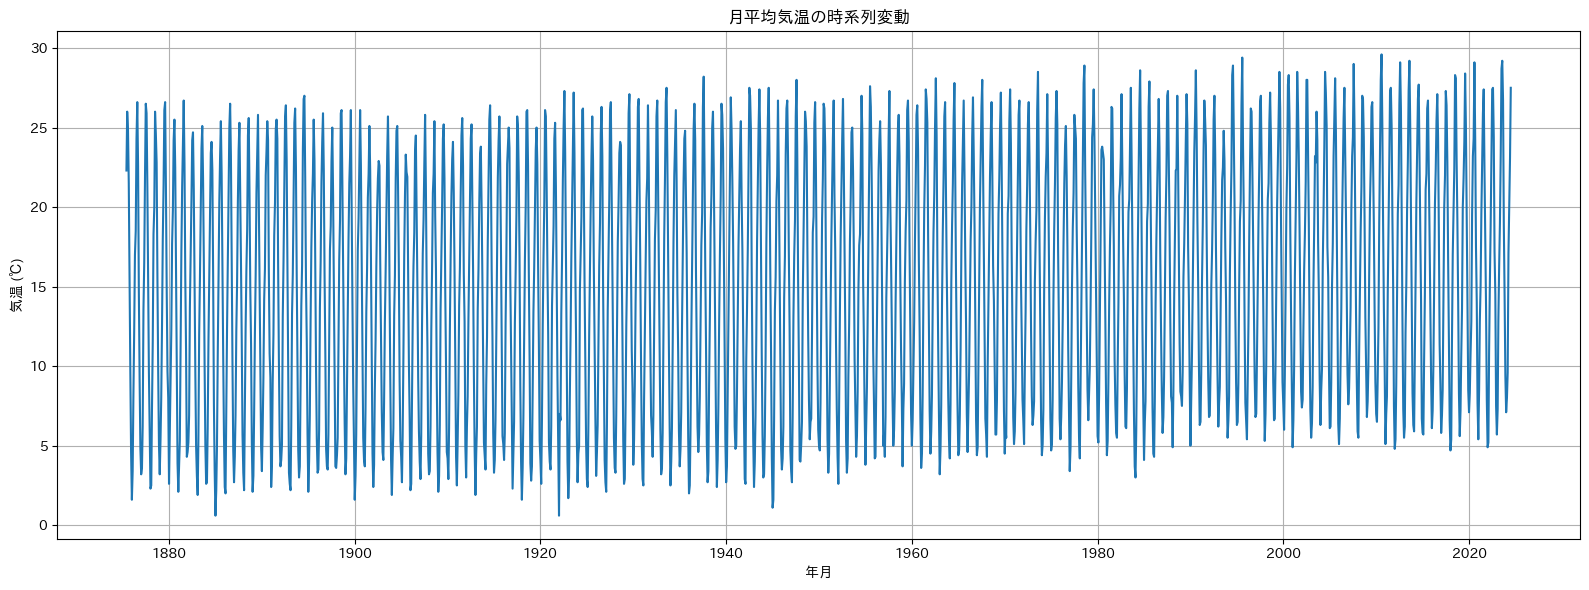

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# 年の平均気温を表す列「年の値」を削除
df = df.drop(columns=["年の値"])

# '月'カラムの日本語の月名を数字に変換する辞書
month_dict = {
    '1月': '01', '2月': '02', '3月': '03', '4月': '04', '5月': '05', '6月': '06',
    '7月': '07', '8月': '08', '9月': '09', '10月': '10', '11月': '11', '12月': '12'
}

# データフレームを長い形式に変更
df_melted = df.reset_index().melt(id_vars="年", var_name="月", value_name="気温")

# '月'カラムを数字に変換
df_melted["月"] = df_melted["月"].map(month_dict)

# '年' と '月' のカラムを組み合わせて新しい '年月' カラムを作成
df_melted["年月"] = pd.to_datetime(df_melted["年"].astype(str) + "-" + df_melted["月"].astype(str) + "-01")

df_melted = df_melted.sort_values(by='年月')

# グラフ描画
plt.figure(figsize=(16,6))
plt.plot(df_melted["年月"], df_melted["気温"])
plt.title("月平均気温の時系列変動")
plt.xlabel("年月")
plt.ylabel("気温 (℃)")
plt.grid(True)
plt.tight_layout()
plt.show()

## 具体的にフーリエ変換して周期性をだしてみよう

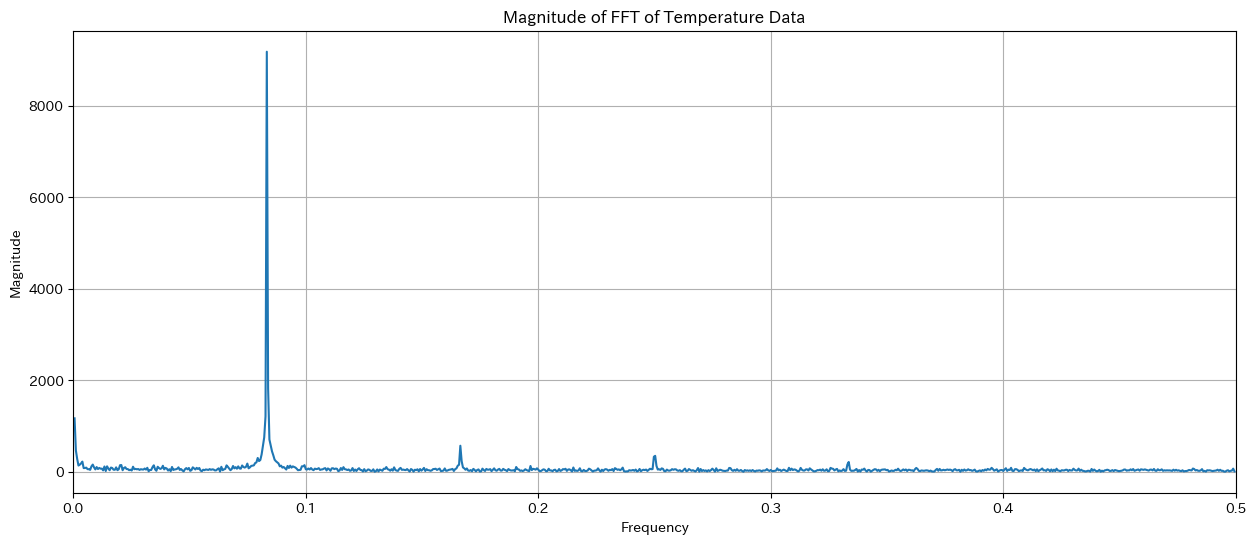

In [ ]:
# NaNを除去
df_cleaned = df_melted["気温"].dropna().reset_index(drop=True)

# フーリエ変換
frequencies = np.fft.fftfreq(len(df_cleaned))
temperature_fft = np.fft.fft(df_cleaned)

# 正の周波数だけを取得
positive_freq_indices = np.where(frequencies > 0)
frequencies = frequencies[positive_freq_indices]
temperature_fft_magnitude = np.abs(temperature_fft[positive_freq_indices])

# 周波数領域での強度を計算して可視化
plt.figure(figsize=(15,6))
plt.plot(frequencies, temperature_fft_magnitude)
plt.title('Magnitude of FFT of Temperature Data')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, 0.5)  # ナイキスト周波数まで表示
plt.show()

- フーリエ変換は, 時系列データの周期性を把握するための方法の一つである
- 横軸の「Frequency」は周期性を示しており, 0.08付近のピークはおそらく年間の周期性, つまり季節性の変動を示していると考えらる.
  - 周波数が0.8とは, 1単位時間あたり0.8周期があることを意味する.
  - 「1/周波数」の計算を行うと, その周波数が何単位時間に1周期あるかを求めることができる
  - 具体的には, 1/0.08=12.5 となり, これは一年の月数に近い値である.
  - 0.17付近のピークは, この値の逆数を取ると約5.88となる. これは, おそらく半年の周期を示している可能性がある.
  - 0.25の位置にあるピークは周期が4となる. これは季節的な変動, つまり四半期ごとの変動を示している可能性が考えられる.
  - そのため, このピークは年間の気温の変動, すなわち季節の変化に関連していると考えられる.

# 第14章：演習問題模範解答
- from tensorflow.keras.datasets import fashion_mnistで取得可能な, Fashion MNISTデータセットを読み込み, データの基本的な特性（例:サンプル数, 特徴量の数, 各ラベルのサンプル数）を確認し, そのデータセットを正規化（または標準化）し, PCAを適用して2Dおよび3Dプロットで主要な2および3成分を表示するPythonプログラムを作成せよ. また, このプロットから, どのファッションアイテムのクラスが他のクラスと類似しているか, または異なっているかを考察せよ.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras.datasets import fashion_mnist

# データの読み込み
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 基本的な特性の確認
print("訓練データの形:", train_images.shape)
print("テストデータの形:", test_images.shape)
print("各ラベルのサンプル数:", np.bincount(train_labels))

4422102/4422102 [==============================] - 0s 0us/step
訓練データの形: (60000, 28, 28)
テストデータの形: (10000, 28, 28)
各ラベルのサンプル数: [6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]


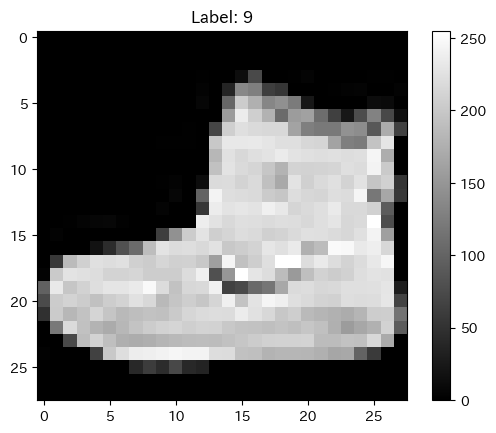

In [ ]:
# train_images[0]の画像を表示
plt.imshow(train_images[0], cmap='gray')
plt.title('Label: ' + str(train_labels[0]))
plt.colorbar()
plt.show()

In [ ]:
fashion_mnist_labels = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

In [ ]:
fashion_mnist_labels[train_labels[0]]

'Ankle boot'

## 2D表現

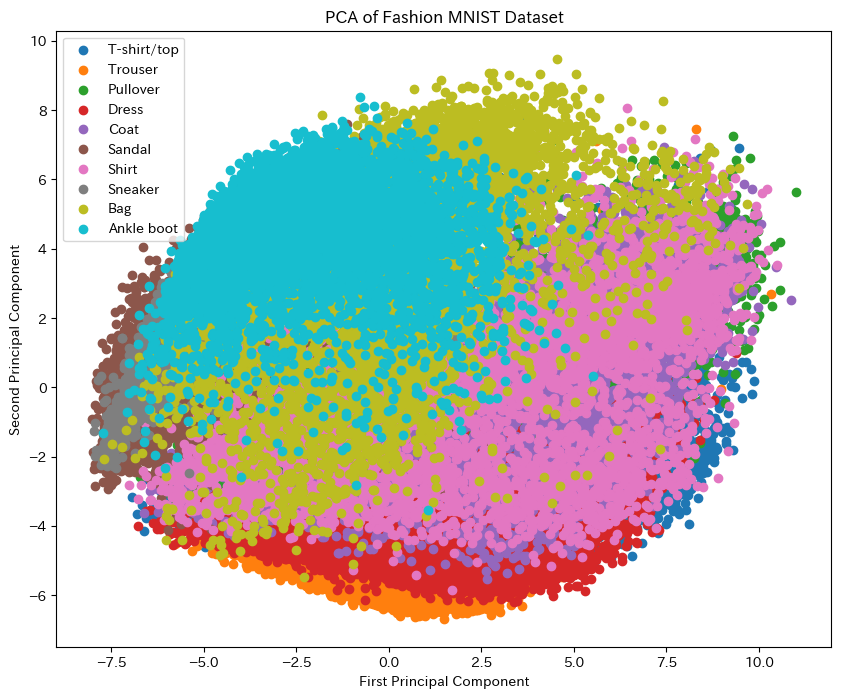

In [ ]:
# 画像を1Dに変換
X = train_images.reshape(train_images.shape[0], -1)

# データを0から1の範囲にスケーリング
X = X / 255.0

# PCAを適用
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 2Dプロットの作成
plt.figure(figsize=(10,8))
for i, label in fashion_mnist_labels.items():
    plt.scatter(X_pca[train_labels == i, 0], X_pca[train_labels == i, 1], label=label)
plt.legend()
plt.title('PCA of Fashion MNIST Dataset')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

- いくつかのクラス（例：T-shirt/top, Trouser, Dress, etc.）は明確に異なるクラスタを形成している
- カテゴリ（例えば, ShirtとT-shirt/top）の間にはオーバーラップが見られる. これは, これらのカテゴリ間で共有される特徴があるか, またはPCAの2つの主成分だけではこれらのカテゴリ間の違いを完全に捉えることができないことを示している



## 3D表現

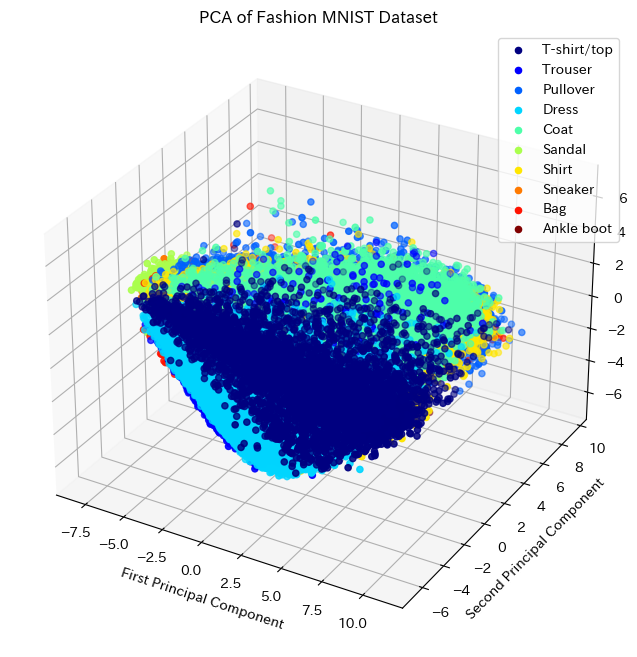

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# 画像を1Dに変換
X = train_images.reshape(train_images.shape[0], -1)

# データを0から1の範囲にスケーリング
X = X / 255.0

# PCAを3成分で適用
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# 3Dプロットの作成
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

colors = plt.cm.jet(np.linspace(0, 1, 10))  # 10色を生成

for i, label in fashion_mnist_labels.items():
    ax.scatter(X_pca[train_labels == i, 0],
               X_pca[train_labels == i, 1],
               X_pca[train_labels == i, 2],
               label=label,
               color=colors[i])

ax.legend()
ax.set_title('PCA of Fashion MNIST Dataset')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
plt.show()

- 3D空間上の点の分布を見ると, 一部のカテゴリは他のカテゴリと明確に分かれていることがわかる. 例えば, "Trousers" や "Bags" は他のカテゴリと比べて比較的分離しているように見える.

In [ ]:
import plotly.graph_objects as go

# ラベルの名前
label_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# カテゴリカラーの設定
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# カテゴリごとにデータをフィルタリングしてプロット
traces = []
for idx, label in enumerate(label_names):
    filtered_data = X_pca[train_labels == idx]
    trace = go.Scatter3d(
        x=filtered_data[:, 0],
        y=filtered_data[:, 1],
        z=filtered_data[:, 2],
        mode='markers',
        marker=dict(
            size=2,
            color=colors[idx],
            opacity=0.8
        ),
        name=label  # 凡例名の設定
    )
    traces.append(trace)

layout = go.Layout(
    margin=dict(l=0, r=0, b=0, t=0)
)

fig = go.Figure(data=traces, layout=layout)
fig.show()

- 3次元に表示し, 軸を動かすことになると結構分別があるようにみえる